In [70]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os.path

In [71]:
scenarios_folder = os.path.expanduser('~/Developer/interscsimulator/mock-simulators/smart_city_model/digital-rails-scenarios/')
dr_events_filename_template = scenarios_folder + '{}/arrivals.xml'

In [72]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if (len(prefix) == 0 or (prefix in child.attrib['person'])):
            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [73]:
trip_time_stats = []
avg_speed_stats = []

scenarios = map(lambda p: 'peak_dr_algo_1_{}'.format(p), range(0, 101, 5))

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s))
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=range(0, 101, 5))
speed_df = pd.concat(avg_speed_stats, axis=1, keys=range(0, 101, 5))

Text(0.5,1,'Trip time (s) / p (%)')

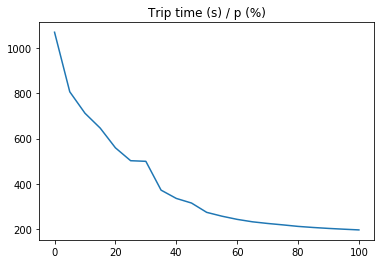

In [74]:
# time_df.T['mean'].plot(title='Trip time (s) / p (%)')

fig, ax = plt.subplots()
ax.plot(time_df.T.index, time_df.T['mean'])
ax.set_title('Trip time (s) / p (%)')
# TODO: Compare with trip time without DR?

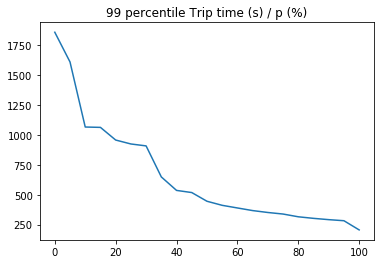

In [75]:
time_df.T['99%'].plot(title='99 percentile Trip time (s) / p (%)')

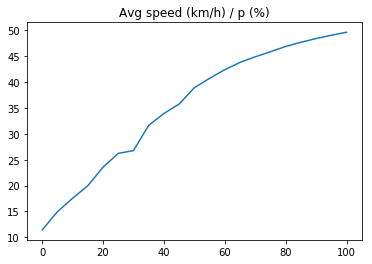

In [34]:
speed_df.T['mean'].plot(title='Avg speed (km/h) / p (%)')
# TODO: Compare with average speed without DR?

In [38]:
speed_df.T['mean']

0      11.423168
5      14.940336
10     17.546593
15     19.964719
20     23.551680
25     26.215289
30     26.760704
35     31.633670
40     33.933604
45     35.749949
50     38.900380
55     40.725906
60     42.396280
65     43.797632
70     44.885480
75     45.853697
80     46.885459
85     47.692717
90     48.410931
95     49.048054
100    49.630354
Name: mean, dtype: float64

In [60]:
# df.xs('avg_speed_km/h', axis=1, level=1).hist()
# plt.suptitle('Trip time distributions / p')

In [62]:
trip_time_stats = []
avg_speed_stats = []

scenarios = map(lambda p: 'peak_dr_algo_1_{}'.format(p), range(0, 96, 5))

for s in scenarios:
    dr = parse_arrivals(dr_events_filename_template.format(s), 'regular')
    dr['avg_speed_km/h'] = 3.6 * dr['distance_m'] / dr['trip_time_s']
    dr = dr.drop(columns='distance_m')
    
    trip_time_stats.append(dr['trip_time_s'].describe(percentiles=[.25,.5,.75,.99]))
    avg_speed_stats.append(dr['avg_speed_km/h'].describe(percentiles=[.25,.5,.75,.99]))
    
time_df = pd.concat(trip_time_stats, axis=1, keys=range(0, 101, 5))
speed_df = pd.concat(avg_speed_stats, axis=1, keys=range(0, 101, 5))

Text(0.5,1,'Trip time outside convoy (s) / p (%)')

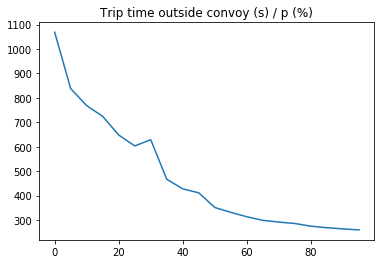

In [67]:
fig, ax = plt.subplots()
ax.plot(time_df.T.index, time_df.T['mean'])
ax.set_title('Trip time outside convoy (s) / p (%)')

Text(0.5,1,'99 percentile Trip time outside convoy (s) / p (%)')

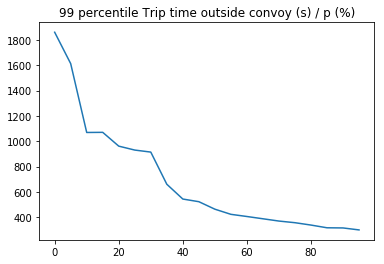

In [69]:
fig, ax = plt.subplots()
ax.plot(time_df.T.index, time_df.T['99%'])
ax.set_title('99 percentile Trip time outside convoy (s) / p (%)')

In [76]:
time_df.T

,count,mean,std,min,25%,50%,75%,99%,max
0,5426.0,1068.755252,481.097417,253.0,675.25,795.0,1603.00,1861.00,1979.0
5,5423.0,806.218883,319.943103,191.0,664.00,725.0,925.50,1612.00,1649.0
10,5419.0,711.600111,262.844353,191.0,570.00,657.0,969.00,1067.00,1140.0
15,5414.0,646.094570,262.238876,191.0,508.00,617.0,900.00,1064.00,1179.0
20,5402.0,559.122917,261.895742,191.0,378.00,487.0,856.00,958.00,1016.0
25,5417.0,502.250877,252.399358,191.0,271.00,446.0,778.00,925.00,972.0
30,5414.0,499.544514,245.052754,191.0,205.00,519.0,695.00,908.87,938.0
35,5412.0,372.482631,149.341615,191.0,205.00,391.0,490.25,648.89,711.0
40,5398.0,335.918674,123.717198,191.0,205.00,355.0,453.00,536.00,574.0
45,5383.0,315.582017,117.310895,191.0,191.00,314.0,431.00,518.00,595.0


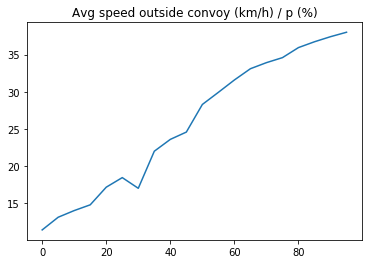

In [68]:
speed_df.T['mean'].plot(title='Avg speed outside convoy (km/h) / p (%)')

In [66]:
speed_df.T

,count,mean,std,min,25%,50%,75%,99%,max
0,5426.0,11.423168,5.505069,4.791511,5.915409,12.541466,15.022157,29.866048,38.522727
5,5154.0,13.129775,4.718504,5.750394,10.109168,13.523936,14.912023,30.091983,38.965517
10,4883.0,14.024827,4.922355,8.317895,9.745529,14.089747,17.006689,30.823233,40.197628
15,4611.0,14.798520,4.959269,8.042748,10.340676,15.468842,17.691045,31.975746,40.357143
20,4340.0,17.170235,6.481627,9.333071,10.896182,16.194268,22.600000,33.257428,39.726562
25,4069.0,18.458262,6.708078,9.755556,11.195277,19.824561,23.651163,33.625532,39.571984
30,3797.0,17.021349,5.546570,10.109168,11.692232,16.783009,19.980354,33.745196,40.039370
35,3526.0,22.007575,5.251291,13.336709,17.495203,21.268569,25.488722,35.904762,40.696996
40,3255.0,23.599479,4.687583,16.519861,19.879245,22.302632,26.340000,36.511929,40.357143
45,2983.0,24.582356,4.943715,15.936807,20.480346,23.529529,27.835319,38.259052,41.851852


In [65]:
# df.xs('avg_speed_km/h', axis=1, level=1).hist()
# plt.suptitle('Avg speed distributions outside convoy / p')